In [1]:
import matplotlib.pyplot as plt
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import time
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:

def reduce_mem_usage(df, verbose=False):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

info = pd.read_csv("train.csv")
info = reduce_mem_usage(info)


In [3]:
buildings = pd.read_csv("building_metadata.csv")
buildings = reduce_mem_usage(buildings)

In [4]:
weather_train  = pd.read_csv("weather_train.csv")
weather_train = reduce_mem_usage(weather_train)

In [5]:
b = pd.merge(info, buildings, on=["building_id"])
test = pd.merge(b, weather_train,on = ["timestamp", "site_id"])

In [6]:
clear_test = test.drop(columns = ["site_id","floor_count","precip_depth_1_hr","sea_level_pressure","wind_direction","wind_speed","cloud_coverage","year_built"])
clear_test["timestamp"] = pd.to_datetime(clear_test["timestamp"], format='%Y-%m-%d %H:%M:%S')
clear_test["month"] = clear_test["timestamp"].dt.month
clear_test["day"] = clear_test["timestamp"].dt.day
clear_test["weekday"] = clear_test["timestamp"].dt.weekday
clear_test["hour"] = clear_test["timestamp"].dt.hour
clear_test = clear_test.drop(columns=["timestamp"])
clear_test["per_1ksqf"] = clear_test["meter_reading"]/clear_test["square_feet"]*1000

In [7]:
clear_test


,building_id,meter,meter_reading,primary_use,square_feet,air_temperature,dew_temperature,month,day,weekday,hour,per_1ksqf
0,0,0,0.000000,Education,7432,25.000000,20.000000,1,1,4,0,0.000000
1,1,0,0.000000,Education,2720,25.000000,20.000000,1,1,4,0,0.000000
2,2,0,0.000000,Education,5376,25.000000,20.000000,1,1,4,0,0.000000
3,3,0,0.000000,Education,23685,25.000000,20.000000,1,1,4,0,0.000000
4,4,0,0.000000,Education,116607,25.000000,20.000000,1,1,4,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
20125600,1400,1,15.375300,Lodging/residential,21168,1.700195,1.700195,3,24,3,12,0.726346
20125601,1400,1,25.084801,Lodging/residential,21168,2.800781,2.199219,3,24,3,13,1.185034
20125602,1400,1,32.343899,Lodging/residential,21168,5.601562,4.398438,3,24,3,14,1.527962
20125603,1400,1,24.221399,Lodging/residential,21168,11.101562,4.398438,3,24,3,15,1.144246


         building_id  meter  meter_reading primary_use  square_feet  \
0                  0      0       0.000000   Education         7432   
103                0      0       0.000000   Education         7432   
206                0      0       0.000000   Education         7432   
309                0      0       0.000000   Education         7432   
412                0      0       0.000000   Education         7432   
...              ...    ...            ...         ...          ...   
1076022            0      0     232.070999   Education         7432   
1076150            0      0     189.069000   Education         7432   
1076278            0      0     169.957993   Education         7432   
1076406            0      0     169.957993   Education         7432   
1076534            0      0     175.417999   Education         7432   

         air_temperature  dew_temperature  month  day  weekday  hour  \
0              25.000000        20.000000      1    1        4     0   
103

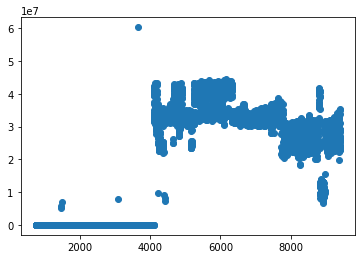

In [9]:
plot = clear_test
plot = plot[plot.meter == 0]
plot = plot[plot.building_id == 0]
plot["TIME"] = ((plot.month*30+plot.day)*24+plot.hour)
print(plot)
plot["reading"] = plot.per_1ksqf*1000000
print(plot)
#plot.plot.scatter(x="air_temperature", y="per_1ksqf", c="weekday",  colormap='viridis')
plt.scatter(plot.TIME,plot.reading)
plt.show()